This notebook is made for "Data Analysis for Genomics Workshop" (DAGWS). 
Tran Bich Ngoc CAO, ENS Paris, August 2020.
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /> This work is protected by the term of <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Licence Creative Commons Attribution - NonCommercial-ShareAlike 4.0 International </a>. Please cite the source in case of re-distribution.

# Supervised Learning: Regression

  <img src="fig/regression-vs-classification-in-machine-learning.png" width=300 >

- In your opinion, when to use Regression instead of Classification? Can we use Regression on the Breast Cancer data to predict benign or malignant tumor?

In this excercise, you will build a Regressor - a statistical model, again, to predict the values of new __continuous__ data from some selected features of the dataset and its target. You will also find the features that influence most significantly to the target, in other words, having the highest variance.?! kind of wrong? Unlike classification, your target is no longer categorical, but continuous.
We will first start with Linear regression model of a very simple example. starting with 1 feature, and then more than 10K features. Let's dive in!

[*Source image: Datacamp*] 
<img src="fig/regress_mechan.png" width=400>

<img src="fig/lossf.png" width=400>

<img src="fig/regress_highD.png" width=400>

### Excercise 1: BirthWeight


- I bet some of you may have seen this dataset. This is the BirthWeight dataset accompanying measurement of newborns biparietal and abdomial diameter. I was lazy to change the format of one column, which including a newline "\n", thus you might not be able to read in the dataset normally. Do you know a way to skip the wrong lines?

In [4]:
# read the data
import pandas as pd  
# bw: birth weight - bpd: biparietal diameter - abdominal diameter - idr: ID number

In [5]:
bw_dt = pd.read_csv("data/BirthWeight.csv",header=0,delimiter=";",error_bad_lines=False)

b'Skipping line 34: expected 4 fields, saw 5\n'


In [6]:
bw_dt.shape

(106, 4)

In [7]:
bw_dt.head()

,bw,bpd,ad,idnr
0,2350,88,92,1
1,2450,91,98,2
2,3300,94,110,3
3,1800,84,89,4
4,2900,89,97,5


- Next we plot the variable birth weight as a function of the abdominal diameter, compute the correlation coefficient and test its significance:

In [8]:
# plot
%matplotlib inline
plt.scatter(bw_dt.ad,bw_dt.bw)
plt.xlabel("Abdominal diameter")
plt.ylabel("Birth weight")
plt.title("Birth weight as a function of the abdominal diameter")
# correlation coefficient 

# test the significance of the correlation coefficient 

NameError: name 'plt' is not defined

You can assess all features by pairplot from seaborn!

- A multipanel display of pairwise scatterplot may be obtained



In [9]:
# pairwise plot, 


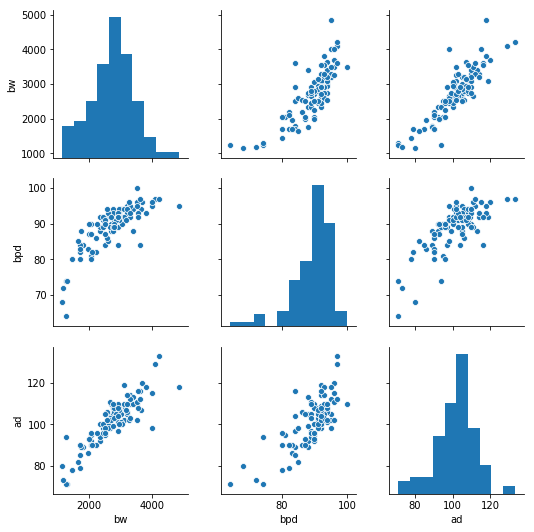

In [10]:
import seaborn as sns
sns.pairplot(bw_dt.iloc[:,0:3])

    Seem like `bw` and `ad` is the most correlated pair!

- Build a correlation matrix 

In [11]:
# correlation matrix
cof = bw_dt.iloc[:,0:4].corr()
cof


,bw,bpd,ad,idnr
bw,1.000000,0.797616,0.873200,-0.188255
bpd,0.797616,1.000000,0.756499,-0.240256
ad,0.873200,0.756499,1.000000,-0.115490
idnr,-0.188255,-0.240256,-0.115490,1.000000


- Plot correlation matrix


In [12]:
plt.matshow(cof)
plt.xticks(range(len(bw_dt.columns)), bw_dt.columns)
plt.yticks(range(len(bw_dt.columns)), bw_dt.columns)
plt.colorbar()
plt.show()

NameError: name 'plt' is not defined

- We then perform a linear regression on these variables:



In [ ]:
# linear model Y ~ X


# summary of the regression


# extract the adjusted-R2

- Import LinearRegression from sklearn.linear_model
- Instantiate the regressor named `reg`
- Create the prediction space with Numpy np.linspace() method with a range from the maximum and minimum of `brcc_df.`
NOTE: try to reshape the array, reshape the arrays by using the .reshape() method and passing in -1 and 1.

When you call fit() on a linear regression model in sklearn, it actually calculate OLS under the hood! In short, we are trying to specify a(i) and b parameters in our model by minimizing the lost (cost) function.
We won't go deep into details of any algorithm in this course, check out our Pack 3: Bioinformatics Algorithms from Cyril!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(bw_dt.ad), max(bw_dt.ad)).reshape(-1,1)

# Reshape your data
bw = bw_dt.bw.values
bw = bw.reshape(-1,1)
ad = bw_dt.ad.values
ad = ad.reshape(-1,1)
# Fit the model to the data
reg.fit(ad, bw)

# Compute predictions over the prediction space: y_pred
pred = reg.predict(prediction_space)

# Print R^2 
print("R squared score: {}" .format(reg.score(ad,bw)))
%matplotlib inline
# Plot regression line
plt.scatter(ad,bw)
plt.plot(prediction_space, pred, color='black', linewidth=3)
plt.xlabel("Abdominal diameter in cm")
plt.ylabel("Birth weight in gram")
plt.show()

Another metric is RMSE: Root mean squared error
- calculate the RMSE

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(prediction_space,pred))
print("Root Mean Squared Error: {}".format(rmse))

_- Here we use implicitly method "Pearson" with pandas dataframe method corr(). Try yourself another methods (Kendall, Spearman...)_ 
Which method performs the best?

- You just made prediction of birthweight from addominal diameter and assess the metrics for you model. Great work!
Now, we will try using multiple predictors :) Moreover, we will apply what we learnt yesterday, splitting data into train and test set!

## Train test split

## Excercise 2: A microarray meta-dataset of non-small cell lung cancer

Dataset was obtained from [ebi](https://www.ebi.ac.uk/arrayexpress/experiments/E-MTAB-6043/?full=true&s_sortby=col_3&s_sortorder=ascending&s_page=19&s_pagesize=25)

In [ ]:
data = pd.read_csv("data/Combat_filtered_exprs.txt",delimiter="\t")

In [ ]:
data = data.transpose()

In [ ]:
data = data.sort_index()

In [ ]:
data.head()

In [ ]:
meta = pd.read_csv("data/metadata_nsmlc.txt",delimiter="\t").iloc[:,0:17]
meta.head()


In [ ]:
print(meta.columns)


In [ ]:
# Clean the data
meta.columns = ["Sample","organism","GEO_dataset","GEO_sample_accession","age","time_unit","sex","ethnic_group","disease", "disease_staging","disease_histology","overall_survival","time_unit_2", "organism_status", "clinical_history","TNM_staging","recurrence" ]

In [ ]:
meta.iloc[1]

Notice that the two GEO_sample_accession between two tables are the same but not matching their orders! Try to get the same order

In [ ]:
meta_sorted = meta.set_index("GEO_sample_accession")
meta_sorted = meta_sorted.sort_index()
meta_sorted.head()

In [ ]:
y = meta_sorted[["overall_survival"]]

In [ ]:
y = y[~y.overall_survival.isin(["Short","long","not available"])]

In [ ]:
y = y.astype(dtype=float)

In [ ]:
X = data[data.index.isin(y.index)]

In [ ]:
X

In [ ]:
y

In [ ]:
y = y.reshape(-1,1)
y

In [ ]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=21)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))


In [ ]:
print(y_pred)

Great! You have built a OLS (Ordinary Least Squared) model to predict survival of patients from microarray data (gene expression dataset). Given a new chip, are you confident to predict if the patients will have a good prognostic by your model? :)

- What does it mean a negative R-squared? How do you interpret the results?

## Regularization: an example with LASSO

Linear Regression minimize the loss function, thus it chooses a coefcient for each feature variable. Large coefcients can lead to overtting, which you have seen from the above excercise with negative R2! 

-> Penalizing large coefcients: Regularization


<img src="fig/ridge.png" width=200>

<img src="fig/lasso.png" width=200>

Alpha is called a hyperparameter, it controls model complexity!

- High alpha: large coefficients either negative or positive (absolute) are penalized

- Alpha = 0 we come back to OLS!

In [ ]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

In [ ]:
from sklearn.linear_model import Lasso
names = X.columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

## Additional Reading:


- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html 
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html